# Group C - Team 2 : Week 3 Deliverable


## 1) Is the KPP equation an ODE or a PDE? Is it linear, homogeneous, autonomous?

1. **ODE or PDE:**
- Since the equation involves only the time derivative $ \partial_t u $ and no spatial derivatives, it is an **ordinary differential equation (ODE)**.

2. **Linearity:**
- The function $ F(u) $ is nonlinear in $ u $, making the equation **nonlinear**.

3. **Homogeneity:**
- The equation has a second member that is non-zero, therefore the equations is not homogeneous.

4. **Autonomous or Non-Autonomous:**
- The right-hand side, $ \alpha F(u) $, does not explicitly depend on t, meaning the system is **autonomous**.

## 2) Show that for all x in $ [0,L] $, the IVP has a unique solution. Show that it is positive.

### Showing that our solution is positive

If $u(0) = 0$, then $u(t)\equiv 0$ is itself a solution because $F(0) = 0$.  
And, if a strictly positive‐initial solution $u(t)$ ever touched zero at some $t > 0$, it would coincide with the zero solution thereafter (by uniqueness), contradicting the fact that it started positive.  
Therefore $u(t)$ cannot cross or touch 0 after $t = 0$. If $u^0 > 0$, it stays positive:

$$
u(t) > 0 \quad (\forall\,t \ge 0).
$$

### Showing that $ F(u) = \frac{u\,(u_0 - u)}{u_0 + u} $  is \(L\)-Lipschitz

We want to show there exists a constant L such that, for all $ u, v > 0 $ ,
$$
\bigl|F(u) - F(v)\bigr| \;\le\; L \,\bigl|u - v\bigr|.
$$


First, observe:
$$
F(u) 
= \frac{u_0\,u - u^2}{u_0 + u}.
$$
Hence,
$$
F(u) - F(v)
= \frac{u_0\,u - u^2}{u_0 + u} 
\;-\;
  \frac{u_0\,v - v^2}{u_0 + v}.
$$

Bring both terms to a common denominator:
$$
F(u) - F(v)
= \frac{\bigl(u_0\,u - u^2\bigr)\,(u_0 + v)
        \;-\;\bigl(u_0\,v - v^2\bigr)\,(u_0 + u)}
       {(u_0 + u)\,(u_0 + v)}.
$$

Hence,

$$
F(u) - F(v)
= \frac{(u-v)}{(u_0 + u)\,(u_0 + v)}
  \;\Bigl[u_0^2 - u_0(u+v) - uv\Bigr].
$$

Taking absolute values,

$$
\bigl|F(u) - F(v)\bigr|
= \frac{\bigl|u - v\bigr|}{(u_0 + u)\,(u_0 + v)} 
  \;\Bigl\lvert u_0^2 - u_0(u+v) - uv \Bigr\rvert.
$$

But, since u and v are positive

$$
\Bigl\lvert u_0^2 - u_0(u+v) - uv \Bigr\rvert 
\;\le\;
u_0^2 + u_0(u+v) + uv 
\;=\;
(u_0 + u)\,(u_0 + v).
$$

Therefore,

$$
\bigl|F(u) - F(v)\bigr|
\;\le\;
\frac{\bigl|u - v\bigr|}{(u_0 + u)\,(u_0 + v)}
\;\cdot\;
(u_0 + u)\,(u_0 + v)
\;=\;
\bigl|u - v\bigr|.
$$

Thus,

$$
\bigl|F(u) - F(v)\bigr|
\;\le\;
\bigl|u - v\bigr|,
$$

which shows F is Lipschitz with a Lipschitz constant L = 1.

### Showing that $ \alpha\,F(u)$ is continuous in $(t,u)$

- **Lipschitz implies continuity**: Since $F$ is Lipschitz in $u$, it is also continuous in $u$. Multiplying by the constant $\alpha$ preserves continuity.  
- **No explicit $t$-dependence**: $g(t,u)$ does not depend on $t$, so it is trivially continuous in $t$.

Therefore $\alpha\,F(u)$ is continuous in both variables $(t,u)$.

### Uniqueness of the solution

Hence for any initial condition $u(0) = u^0$, there is a **unique** local solution since $ \alpha\,F(u)$ is continuous in $(t,u)$ and $ \alpha\,F(u)$ is L-Lipshcitz with respect to the second variable u. Thus our IVP, 
$$
\frac{du}{dt} = \alpha\,F(u),
\quad
u(0) = u^0
$$
has a unique solution for $t \in [0,T]$.

---

**Summary**  
1. **Positivity**: By a non‐crossing argument with the zero solution, if $u^0 > 0$, then $u(t)$ remains strictly positive for all $t$
2. **$\alpha\,F(u)$ is Lipschitz** in $u$ (since $F$ is Lipschitz).  
3. **$g(t,u) = \alpha\,F(u)$ is continuous** in $(t,u)$.  
4. 2 and 3 guarantees a unique solution to $\frac{du}{dt} = \alpha\,F(u)$, $u(0) = u^0$.  


## 3) Linearize the equation around the stable equilibria found in question 1.4.c and solve the linearized IVP(s).


We consider a small perturbation around 
$u_0$:

$$
u(t) = u_0 + v(t)
$$

Plugging $u(t)$ into the system, we get:

$$
\frac{\partial}{\partial t} (u_0 + v(t)) = \alpha F(u_0 + v(t))
$$

Expanding $F(u_0 + v)$ via first-order Taylor expansion around $u_0$, we obtain:

$$
v'(t) = \alpha F(u_0) + \alpha F'(u_0)v(t)
$$

Since $F(u_0) = 0$ and $F'(u_0) = - \frac{1}{2}$ (already calculated in 1.4.c), we get:

$$
v'(t) = \alpha F'(u_0)v(t) = - \frac{\alpha}{2} v(t)
$$

Solving this linear ODE, we obtain:

$$
v(t) = v(0) e^{- \frac{\alpha}{2}t}
$$

Thus, the solution to the linearized IVP is:

$$
u(t) = u_0 + v(0) e^{- \frac{\alpha}{2}t}
$$



## 4) Implement the forward Euler method to solve the IVP on $[0, T ]$ for $T > 0$.

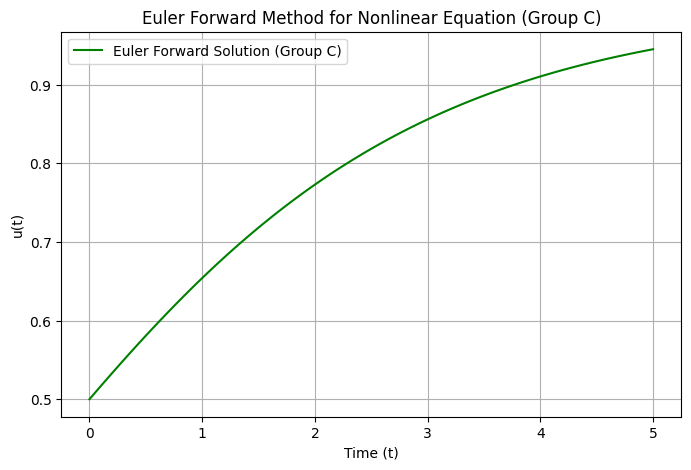

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0  
u0_val = 1.0  
T = 5  
N = 100
u0=0.5

def f(t, u):
    return alpha * u * (u0_val - u) / (u0_val + u)

def euler_forward(T, f, u0, N):
    h = T / (N + 1)  
    t = np.linspace(0, T, N + 2)  
    z = np.zeros(N + 2)  
    z[0] = u0  
   
    for k in range(N + 1):
        z[k+1] = z[k] + h * f(t[k], z[k])
   
    return z

u_euler_groupC = euler_forward(T, f, u0, N)

t_values = np.linspace(0, T, N + 2)  
plt.figure(figsize=(8, 5))
plt.plot(t_values, u_euler_groupC, label="Euler Forward Solution (Group C)", color="green")
plt.xlabel("Time (t)")
plt.ylabel("u(t)")
plt.title("Euler Forward Method for Nonlinear Equation (Group C)")
plt.legend()
plt.grid()
plt.show()


## 5) Prove the convergence of the Crank-Nicolson method for the $\infty$-norm and implement it to define an implicit scheme on $[0, T ]$ for $T > 0$. Implement Newton’s method to solve the implicit scheme and the IVP.

Let $E$ be a Banach space. Let $T > 0$ and $I = [0,T]$. 

In seminar exercise 4, we already proved the **convergence of the Crank-Nicolson scheme for the infinite norm** for a function $f$ s.t $f \in C(I \times E, E)$ and $f \text{ is an } L$-Lipschitz map with respect to its second variable (with $L > 0$ ). 

We use the Crank-Nicolson method to define an **implicit scheme** for our IVP on $[0, T ]$ for $T > 0$. We define :

$$
\bullet \text{ (Step) } h = \frac{T}{N+1},
$$

$$
\bullet \text{ (Mesh) } (t^n)_{0 \leq n \leq N+1} \in [0,T]^{N+2} \text{ by for all } n \in [0, N+1], \quad t^n = nh = \frac{nT}{N+1}.
$$

$$
\bullet \text {(Approximation)} \forall N \in \mathbb{N}, \quad v = (v^n)_{0 \leq n \leq N+1} \in E^{N+2} \text{ by } 
\left\{
\begin{array}{ll}
z^0 = u^0 \\
\forall n \in [0, N], \quad z^{n+1} = z^n + \frac{h \alpha}{2} \big( F(z^n) +  F(z^{n+1}) \big)
\end{array}
\right.
$$

Thus, we obtain the desired numerical scheme.

We still have to show that $F$'s Lipschitz-constant is strictly positive to verify the convergence of the Cranck-Nicholson scheme for the infinite norm for the implicit scheme. Thus, we compute the derivative of $F$ using the quotient rule:

$$
F'(u) = \frac{d}{du} \left[ u \frac{u_0 - u}{u_0 + u} \right] = \frac{u_0^2 - 2 u_0 u - u^2}{(u_0 + u)^2}.
$$

For $u \geq 0$ and $u_0 > 0$, $F'(u)$ stays within $[-1, 1]$. Hence

$$
|F'(u)| \leq 1 \quad \text{for all } u \geq 0,
$$

which implies that $F$ is **1-Lipschitz**.



The Newton method must then be implemented to solve the implicit scheme and the IVP:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0  
u0_val = 1.0  
T = 5.0  
N = 100  
dt = T / N  
u0 = 0.5  

def f(u):
    return alpha * u * (u0_val - u) / (u0_val + u)

def newton_method_cn(u_n):
    tol = 1e-6  
    max_iter = 20
    u_k = u_n  
   
    for _ in range(max_iter):
        G = u_k - u_n - (dt / 2) * (f(u_k) + f(u_n))
        G_prime = 1 - (dt / 2) * alpha * ((u0_val - u_k) / (u0_val + u_k) - u_k * (1 + u0_val) / (u0_val + u_k)**2)
       
        u_k_next = u_k - G / G_prime
       
        if abs(u_k_next - u_k) < tol:
            return u_k_next
       
        u_k = u_k_next

    return u_k  

u_cn = np.zeros(N + 1)  
u_cn[0] = u0  

for n in range(N):
    u_cn[n+1] = newton_method_cn(u_cn[n])

t_values = np.linspace(0, T, N + 1)

plt.figure(figsize=(8, 5))
plt.plot(t_values, u_cn, label="Crank-Nicholson (Newton's Method)", color="blue")
plt.xlabel("Time (t)")
plt.ylabel("u(t)")
plt.title("Crank-Nicholson Method using Newton's Solver")
plt.legend()
plt.grid(True)
plt.show()